<a href="https://colab.research.google.com/github/AndreVelasques7/inteligencia-artificial/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("precos_carros_brasil.csv")
df.dtypes


year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [ ]:
# 1a. carregue a base de dados media_precos_carros_brasil.csv
dados = pd.read_csv("precos_carros_brasil.csv")

# 1b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para
#   resolver o problema de valores faltantes
dados.isna().sum()

## Para dados categoricos vou preencher com 'Not informed'
dados.fillna({'month_of_reference': 'Not informed'}, inplace=True)
dados.fillna({'fipe_code':          'Not informed'}, inplace=True)
dados.fillna({'authentication':     'Not informed'}, inplace=True)
dados.fillna({'brand':              'Not informed'}, inplace=True)
dados.fillna({'model':              'Not informed'}, inplace=True)
dados.fillna({'fuel':               'Not informed'}, inplace=True)
dados.fillna({'gear':               'Not informed'}, inplace=True)
dados.fillna({'engine_size':        'Not informed'}, inplace=True)

## Para dados numericos vou usar
dados.fillna({'year_of_reference': dados['year_of_reference'].mode()[0]}, inplace=True)
dados.fillna({'year_model':        dados['year_model'].mode()[0]}, inplace=True)
dados.fillna({'avg_price_brl':     dados['avg_price_brl'].mode()[0]}, inplace=True)

# 1c. Verifique se há dados duplicados nos dados
dados.duplicated().sum()
dados.drop_duplicates(inplace=True)
dados.drop(dados.tail(1).index, inplace=True)


# 1d. Crie duas categorias, para separar colunas numéricas e categóricas.
# Imprima o resumo de informações das variáveis numéricas
# e categóricas (estatística descritiva dos dados)
numerical_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categorical_cols = [col for col in dados.columns if dados[col].dtype == 'object']

dados[numerical_cols].describe()
dados[categorical_cols].describe()

## 1e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)
dados['model'].value_counts()
dados['brand'].value_counts()
contagem_modelo_marca = dados.groupby(['brand', 'model']).size().reset_index(name='count')



model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

[Text(0, 0, '44962'),
 Text(0, 0, '44312'),
 Text(0, 0, '38590'),
 Text(0, 0, '33150'),
 Text(0, 0, '29191'),
 Text(0, 0, '12090')]

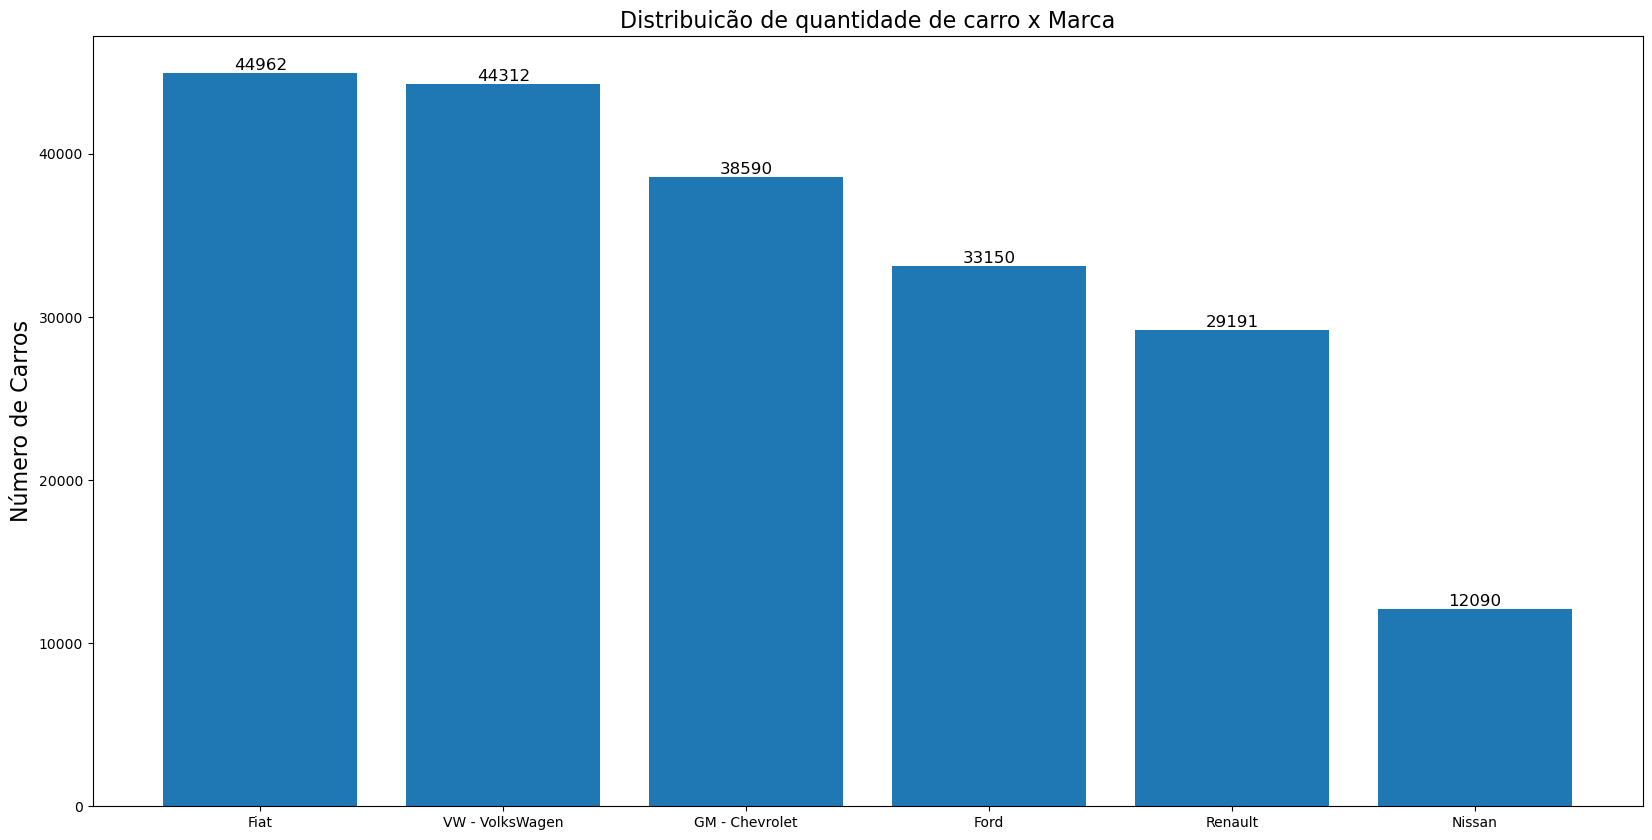

In [ ]:
# 2a. Gere um gráfico da distribuição da quantidade de carros por marca
plt.figure(figsize=(20, 10))
grafico_per_brand = plt.bar(dados['brand'].value_counts().index, dados['brand'].value_counts())
plt.title('Distribuicão de quantidade de carro x Marca', fontdict={'fontsize':16 })
plt.ylabel('Número de Carros', fontdict={'fontsize':16 })
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.bar_label(grafico_per_brand, fmt="%d", label_type="edge", size=12)


[Text(0, 0, '161883'), Text(0, 0, '40412')]

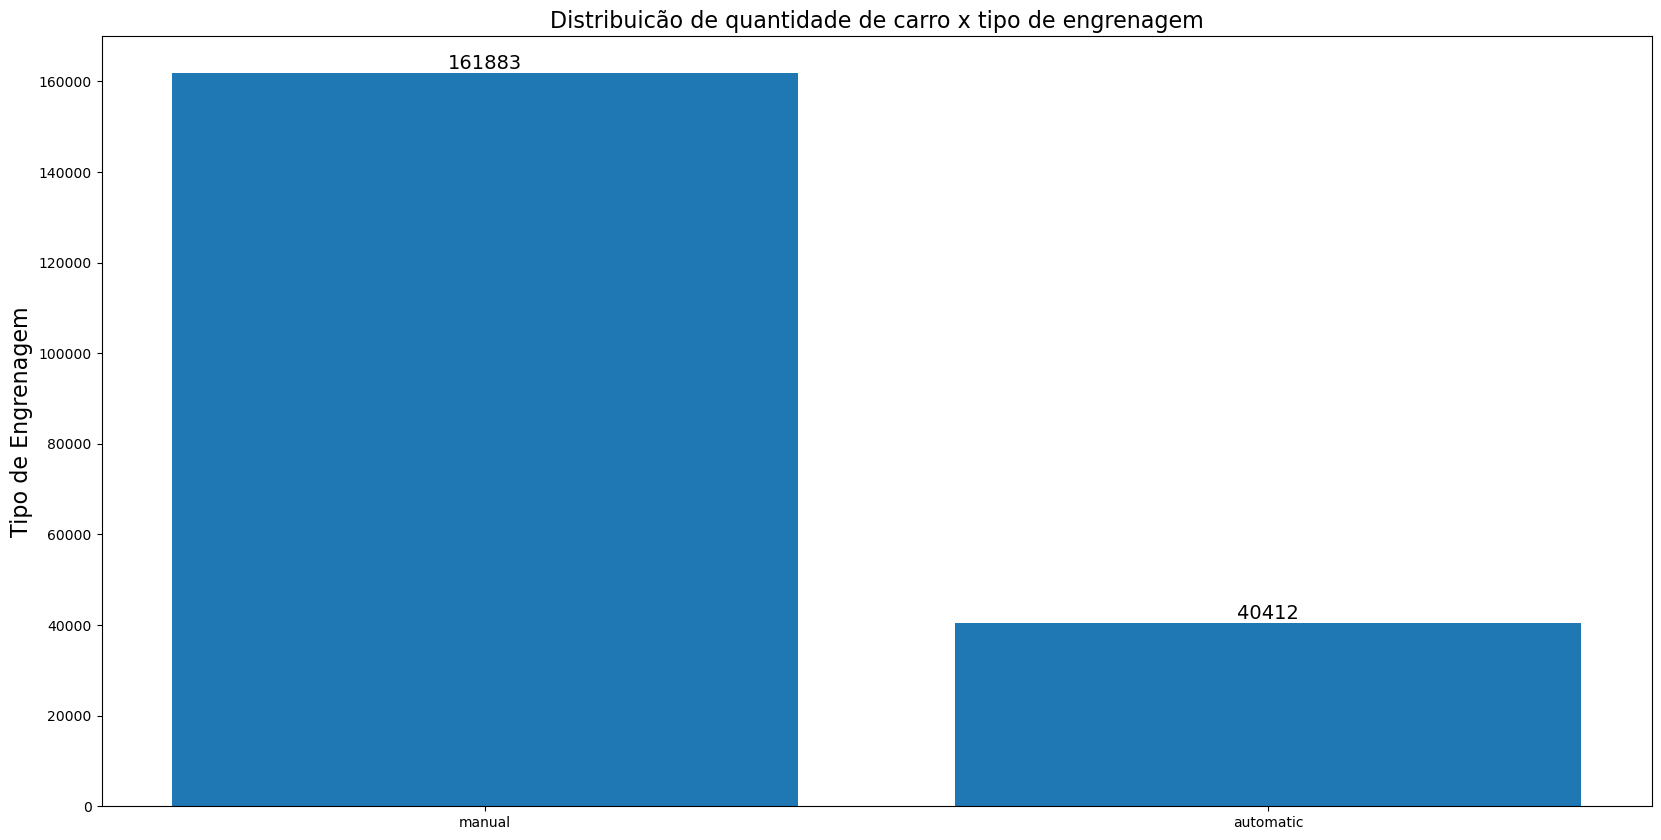

In [ ]:
# 2b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro
plt.figure(figsize=(20, 10))
grafico_per_brand = plt.bar(dados['gear'].value_counts().index, dados['gear'].value_counts())
plt.title('Distribuicão de quantidade de carro x tipo de engrenagem', fontdict={'fontsize':16 })
plt.ylabel('Tipo de Engrenagem', fontdict={'fontsize':16 })
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.bar_label(grafico_per_brand, fmt="%d", label_type="edge", size=14)

,month_of_reference,Media Preco
4,January,54840.0
3,February,55825.0
7,March,56849.0
0,April,57150.0
8,May,57800.0
6,June,58066.0
5,July,57894.0
1,August,57924.0
11,September,58199.0
10,October,58227.0


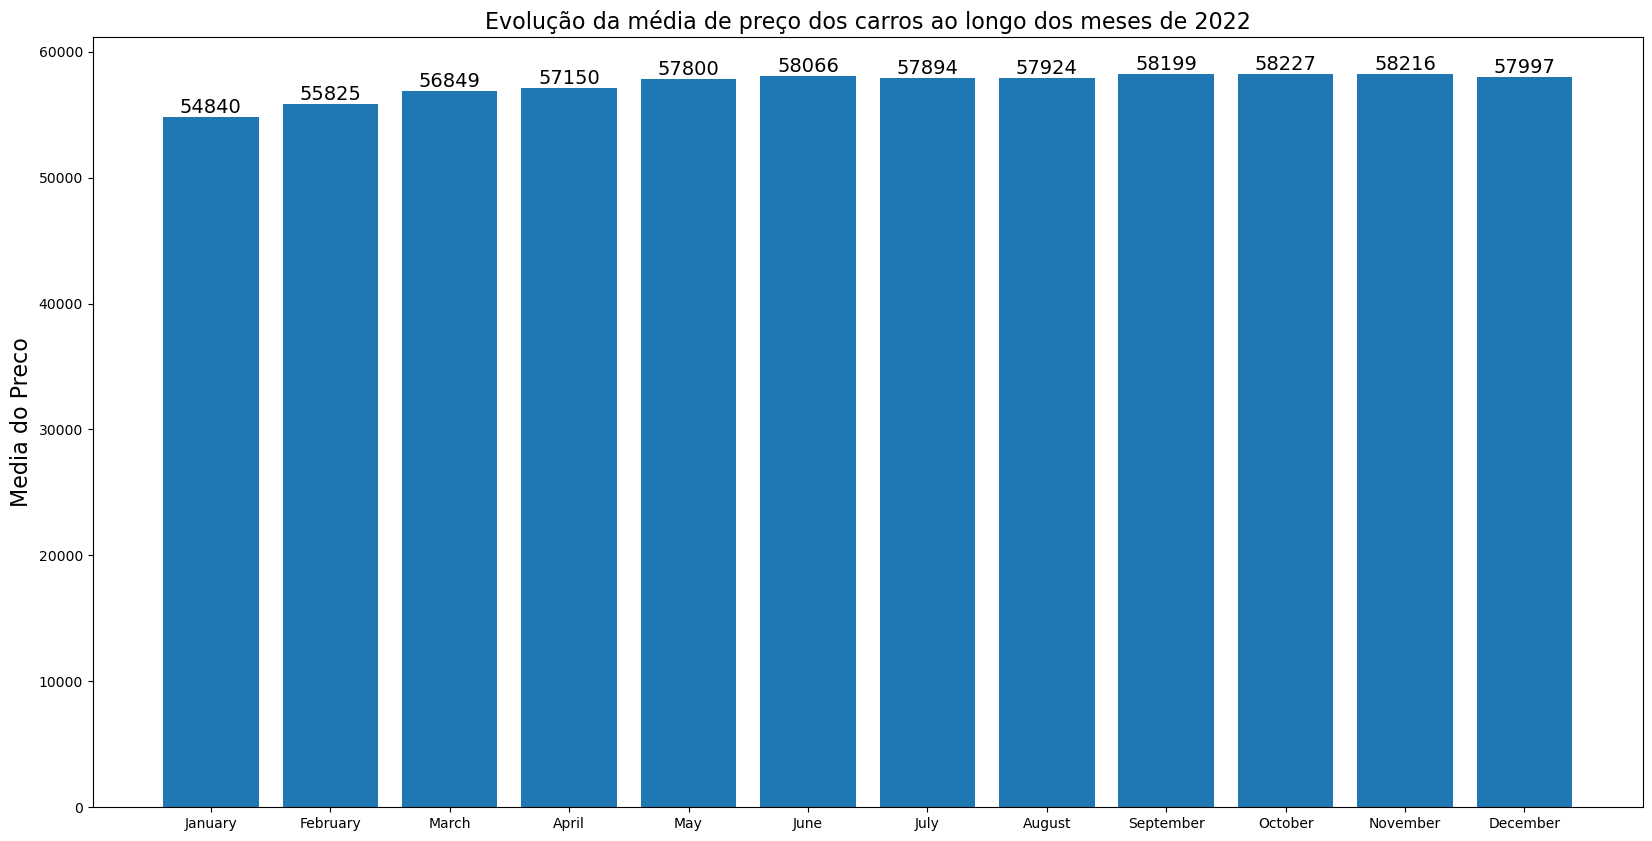

In [ ]:
# 2c. Gere um gráfico da evolução da média de preço dos carros
# ao longo dos meses de 2022 (variável de tempo no eixo X)
dados_2022 = dados[dados['year_of_reference'] == 2022]
dados_2022 = dados_2022.groupby(['month_of_reference'])['avg_price_brl'].mean().round(0)

ordem_mes = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

dados_2022 = dados_2022.reset_index(name='Media Preco')

dados_2022['month_of_reference'] = pd.Categorical(dados_2022['month_of_reference'], categories=ordem_mes, ordered=True)
dados_2022.sort_values(by='month_of_reference', inplace=True)

plt.figure(figsize=(20, 10))
grafico_per_brand = plt.bar(dados_2022['month_of_reference'].value_counts().index, dados_2022['Media Preco'].values)
plt.title('Evolução da média de preço dos carros ao longo dos meses de 2022', fontdict={'fontsize':16 })
plt.ylabel('Media do Preco', fontdict={'fontsize':16 })


plt.bar_label(grafico_per_brand, fmt="%d", label_type="edge", size=14)
dados_2022.head(14)


Text(0.5, 1.0, 'Média de preço dos carros por marca e tipo de engrenagem')

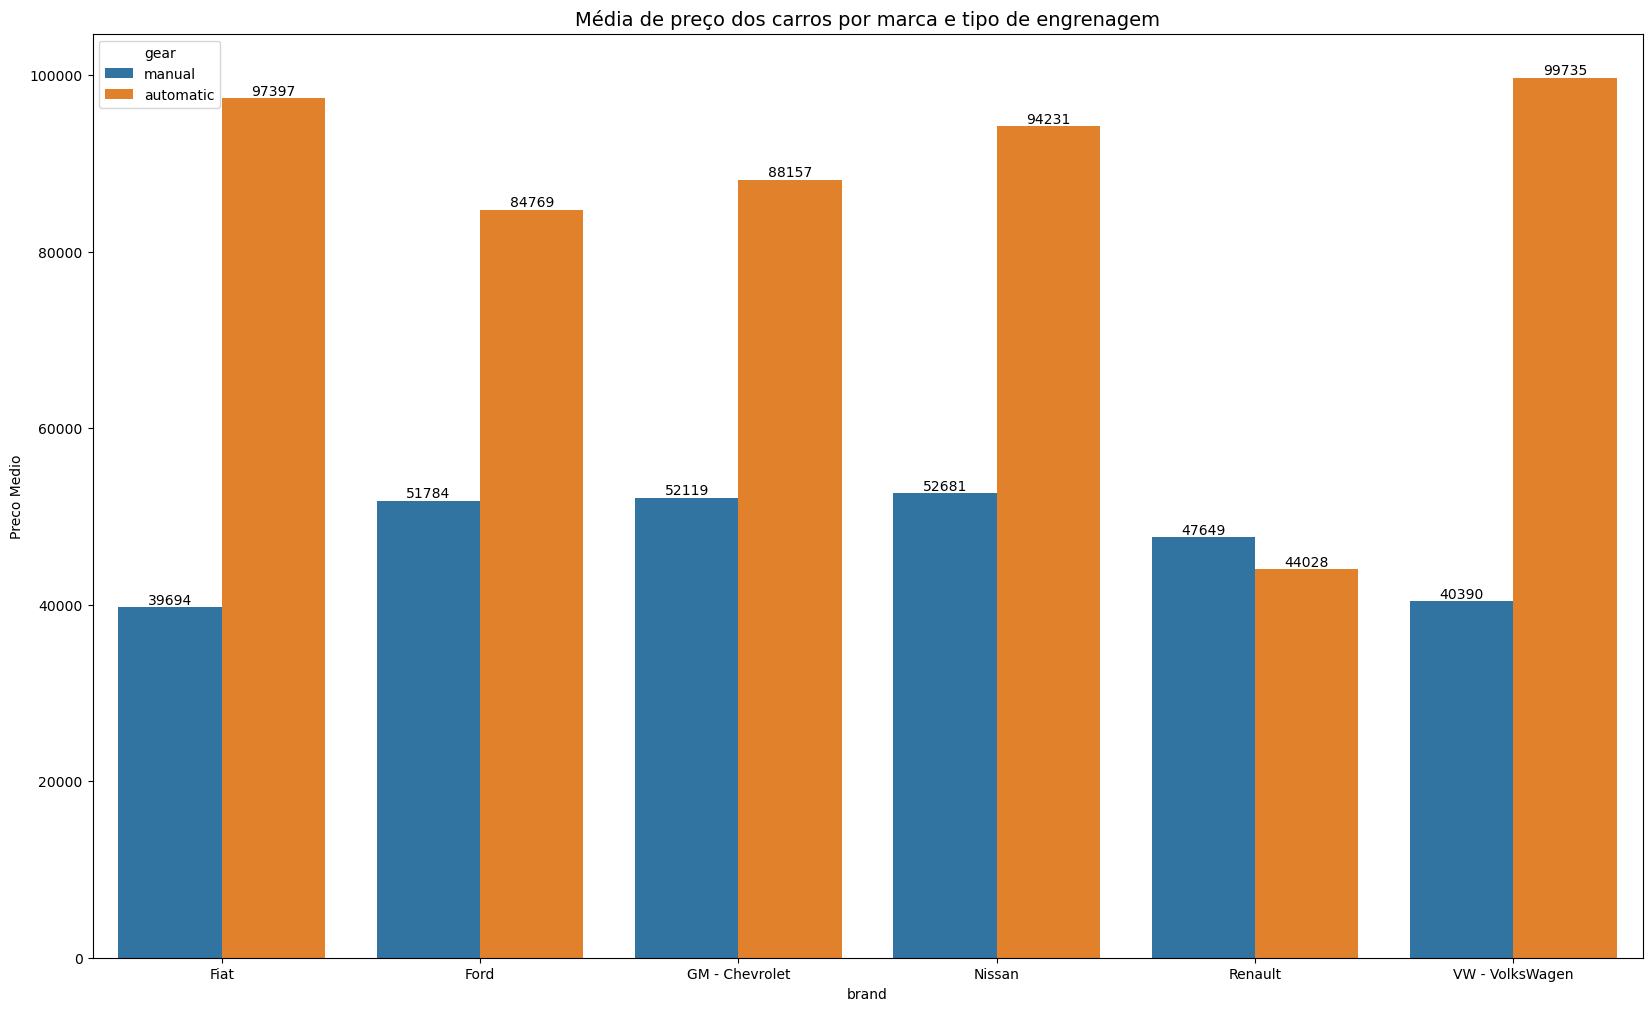

In [ ]:
# 2d. Gere um gráfico da distribuição da média de preço dos carros
# por marca e tipo de engrenagem

media_de_preco = dados.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(0)
media_de_preco.head(8)

media_de_preco = media_de_preco.reset_index(name='Preco Medio')
media_de_preco.head()

plt.figure(figsize=(20, 12))
grafico_brand_gear = sns.barplot(x='brand', y='Preco Medio', hue='gear', data=media_de_preco, hue_order=['manual', 'automatic'])
# Adiciona os labels nas barras
plt.bar_label(grafico_brand_gear.containers[0], fmt='%.0f', label_type='edge') # para a primeira engrenagem
plt.bar_label(grafico_brand_gear.containers[1], fmt='%.0f', label_type='edge') # para a segunda engrenagem

plt.title("Média de preço dos carros por marca e tipo de engrenagem", fontdict={'fontsize': 14})

Text(0.5, 1.0, 'Média de preço dos carros por marca e tipo de combustível')

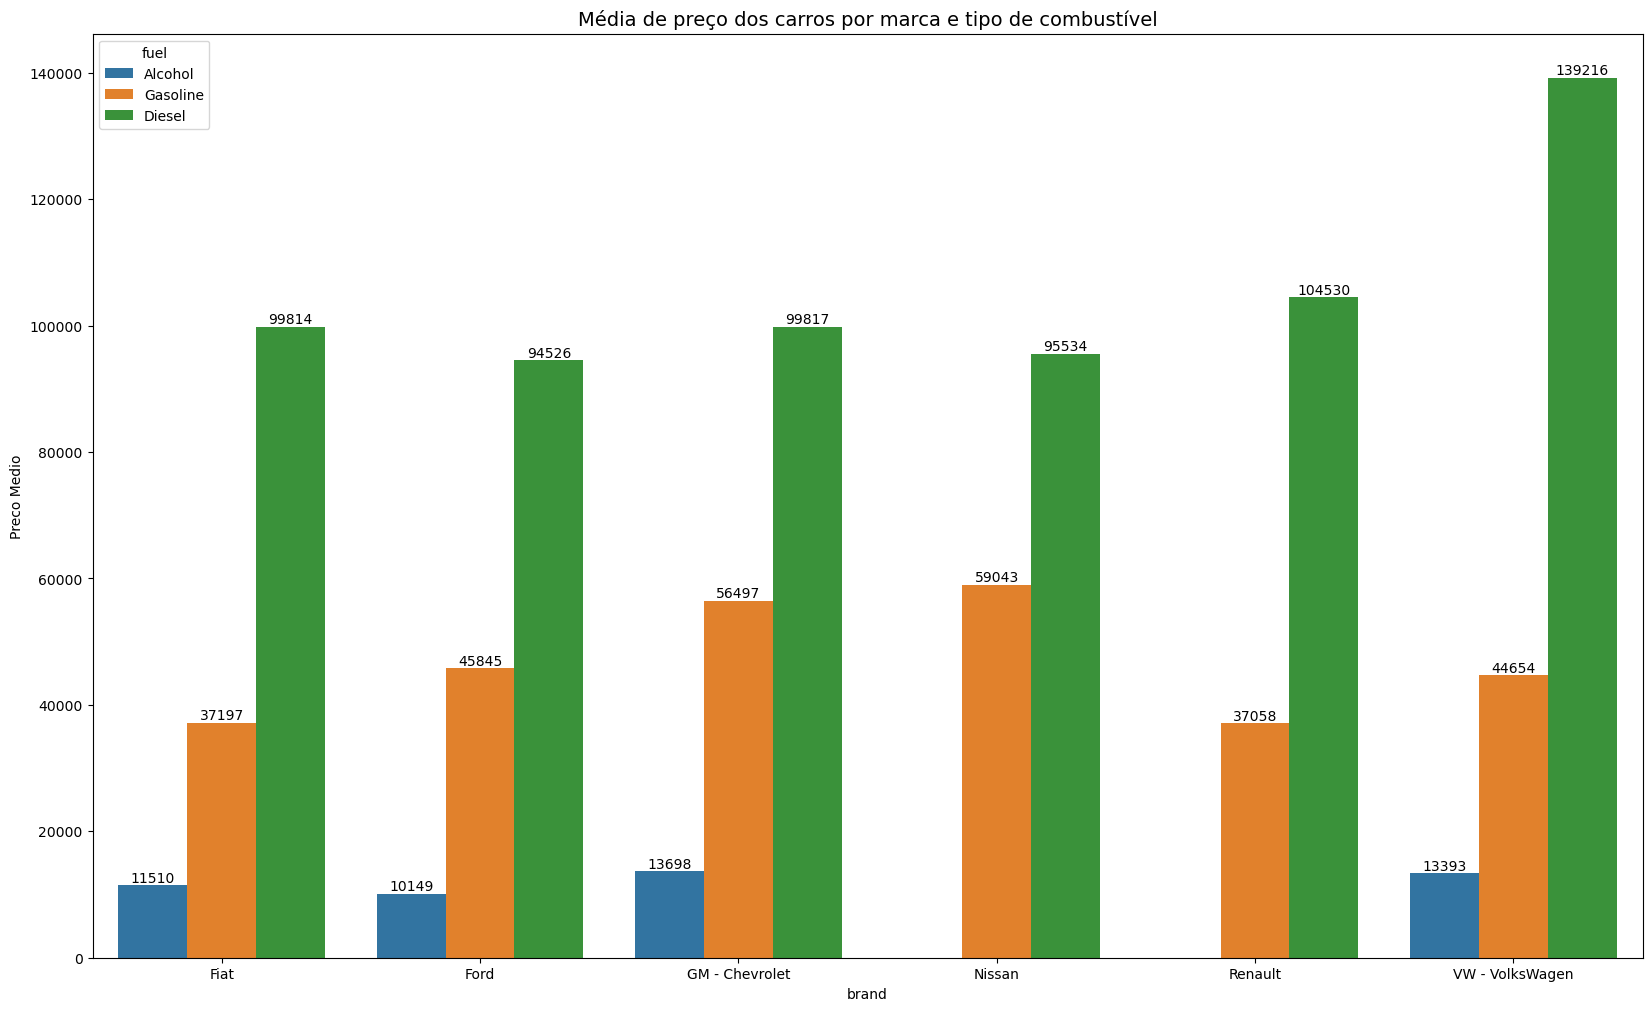

In [ ]:
# 2f. Gere um gráfico da distribuição da média de
# preço dos carros por marca e tipo de combustível
media_de_preco_fuel = dados.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(0)
media_de_preco_fuel = media_de_preco_fuel.reset_index(name='Preco Medio')

plt.figure(figsize=(20, 12))
grafico_brand_fuel = sns.barplot(x='brand', y='Preco Medio', hue='fuel', data=media_de_preco_fuel, hue_order=['Alcohol', 'Gasoline', 'Diesel'])
# Adiciona os labels nas barras
plt.bar_label(grafico_brand_fuel.containers[0], fmt='%.0f', label_type='edge') # para a primeira engrenagem
plt.bar_label(grafico_brand_fuel.containers[1], fmt='%.0f', label_type='edge') # para a segunda engrenagem
plt.bar_label(grafico_brand_fuel.containers[2], fmt='%.0f', label_type='edge') # para a segunda engrenagem

plt.title("Média de preço dos carros por marca e tipo de combustível", fontdict={'fontsize': 14})



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# 3a. Escolha as variáveis numéricas (modelos de Regressão) para serem
# as variáveis independentes do modelo.A variável target é avg_price.
# Observação: caso julgue necessário, faça a transformação de variáveis
# categóricas em variáveis numéricas para inputar no modelo.
# Indique quais variáveis foram transformadas e como foram transformadas
mes_para_numero = {
    "January":   1,
    "February":  2,
    "March":     3,
    "April":     4,
    "May":       5,
    "June":      6,
    "July":      7,
    "August":    8,
    "September": 9,
    "October":   10,
    "November":  11,
    "December":  12,
}

# Variaveis escolhidas:
# year_of_reference, month_of_reference, brand, fuel, gear,
# engine_size, year_model
dados['month_of_reference_numerical'] = dados['month_of_reference'].apply(lambda x: mes_para_numero[x])
dados['brand'] = LabelEncoder().fit_transform(dados['brand'])
dados['fuel'] = LabelEncoder().fit_transform(dados['fuel'])
dados['gear'] = LabelEncoder().fit_transform(dados['gear'])
dados['engine_size'] = dados['engine_size'].apply(lambda x: float(x.replace(',', '.')))
dados['model'] = LabelEncoder().fit_transform(dados['model'])

dados_num = dados.drop([
    'month_of_reference', 'fipe_code',
    'authentication',
    ], axis=1)

dados_num.head()

,year_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_of_reference_numerical
0,2021.0,2,297,2,1,1.0,2002.0,9162.0,1
1,2021.0,2,297,2,1,1.0,2001.0,8832.0,1
2,2021.0,2,297,2,1,1.0,2000.0,8388.0,1
3,2021.0,2,297,0,1,1.0,2000.0,8453.0,1
4,2021.0,2,260,2,1,1.6,2001.0,12525.0,1


In [ ]:
# b. Crie partições contendo 75% dos dados para treino
# e 25% para teste
X = dados_num.drop(['avg_price_brl'], axis = 1)
Y = dados_num['avg_price_brl']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [ ]:
# 3c. Treine modelos RandomForest(biblioteca RandomForestRegressor) e
# XGBoost(biblioteca XGBRegressor) para predição dos preços
# dos carros.
#
# Observação: casojulgue necessário, mude os
# parâmetros dos modelos e rode novos modelos.
#
# Indique quais parâmetros foram inputados e indique
# o treinamento de cada modelo
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 3d. Grave os valores preditos em variáveis criadas
valores_preditos_rf = model_rf.predict(X_test)
valores_preditos_xg = model_xgboost.predict(X_test)


In [ ]:
# e. Realize a análise de importância das variáveis
# para estimar a variável target, para cada modelo treinado
model_rf.feature_importances_
feature_importances_rf = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_rf)

model_xgboost.feature_importances_
feature_importances_xg = pd.DataFrame(model_xgboost.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_xg


                              importance
engine_size                     0.449622
year_model                      0.390752
model                           0.057720
gear                            0.033611
fuel                            0.032630
brand                           0.017636
year_of_reference               0.012339
month_of_reference_numerical    0.005689


,importance
engine_size,0.421936
year_model,0.201214
fuel,0.149015
gear,0.133845
brand,0.049174
model,0.021189
year_of_reference,0.017395
month_of_reference_numerical,0.006232


In [ ]:
# 3g. Escolha o melhor modelo com base nas
# métricas de avaliação MSE, MAE e R²
mse_rf = mean_squared_error(Y_test, valores_preditos_rf)
mae_rf = mean_absolute_error(Y_test, valores_preditos_rf)
r2s_rf = r2_score(Y_test, valores_preditos_rf)
print(r2s_rf)

mse_xg = mean_squared_error(Y_test, valores_preditos_xg)
mae_xg = mean_absolute_error(Y_test, valores_preditos_xg)
r2s_xg = r2_score(Y_test, valores_preditos_xg)

r2s_xg


0.9976656297876684


0.9892813707154136